# Group 4 - Final Project
Group Members: Aaron Badowski, Chris Liu, Omar Mahboob

Report of project can be found @:https://docs.google.com/document/d/1qkzKDr3cF4Ny5iEFFF8BTTj5aGyNebAPAslZHQ6IvAs/edit?usp=sharing



                

## Importing Some Packages

In [2]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
import sklearn.model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

## Load the Data

In [4]:
df = pd.read_csv('winequality-white.csv')
dataset = np.matrix(df)
df.head(6)
dataset = np.matrix(df)


## Breaking down the dataset to Features and Targets

In [5]:
(m, n) = df.shape
numSamples = m
numFeatures = n-1
names = df.columns.tolist()
featurenames = names[0:numFeatures]
targetname = names[numFeatures]
print("This Dataset contains", numSamples, "samples with", numFeatures, "features")
X0 = np.array(dataset[:, :numFeatures])
Y = np.array(dataset[:, numFeatures])
Y = np.ravel(Y)

This Dataset contains 4898 samples with 11 features


## Creating Training and Test data frames

In [6]:
numTrain = int(m*.7)
numTest = numSamples - numTrain

Xtr, Xts, Ytr, Yts = train_test_split(X0, Y, test_size=0.3,shuffle=True)
print("The training sample size for this dataset is", numTrain,"samples")
print("The test sample size for this dataset is", numTest,"samples")

The training sample size for this dataset is 3428 samples
The test sample size for this dataset is 1470 samples


## Simple Linear Regression

Worked on primarily by Omar Mahboob. 

Suggestions from Aaron and Chris to include/not include certain things. 

The first thing that the group decided to work on was perform simple linear regression on the data, and find out which feature most accurately predicts the wine quality for the white wine. Our team decided not to use red wine since this is not a classification problem where both wines are compared. We just want to observe which feature(s) most accurately predict the quality of the wine.

We will now move on to finding the predictor variable (x) that best predicts the target variable (y). We will do this by finding the R^2 values for all the predictors and observing which ones best predict the target variable (i.e. quality of wine). We will then create a graph of this predictor variable versus the target variable.

First, we will create a linear function that will calculate all the required means and covariances necessary to find R^2 values. It will be called __fit_linear__:

In [5]:
y = np.array(df['quality'])

In [6]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x, 
    The function returns beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    # TODO complete the following code
    xm = np.mean(x)
    ym = np.mean(y)
    sxx = np.mean((x-xm)**2)
    sxy = np.mean((x-xm)*(y-ym))
    syy = np.mean((y-ym)**2)
    beta1 = sxy/sxx
    beta0 = ym - beta1*xm
    rhoxy = sxy/(np.sqrt(sxx)*np.sqrt(syy))
    rsq = rhoxy**2
    return beta0, beta1, rsq

We will now loop through all the predictor variables (x) and find the which has the highest R^2 value in relation to the predicted variable (y).

In [7]:
Rsq_list = []
for name in df.columns:
    
    # Skip over the case where the attribute is the target variable.
    if name != 'quality':
        # compute the r^2 value for the predictor
        x = np.array(df[name])
        beta0,beta1,rsq = fit_linear(x,y)
        yp = beta0+beta1*x
        Rsq_list.append(rsq)
        # print the value.  note the syntax to format the string
        print('{0:10}         R^2:{1:.3f}'.format(name, rsq))
print("The Maximum R^2 value is from alcohol content, where R^2= {0:.3f}".format(np.max(Rsq_list)))

fixed acidity         R^2:0.013
volatile acidity         R^2:0.038
citric acid         R^2:0.000
residual sugar         R^2:0.010
chlorides          R^2:0.044
free sulfur dioxide         R^2:0.000
total sulfur dioxide         R^2:0.031
density            R^2:0.094
pH                 R^2:0.010
sulphates          R^2:0.003
alcohol            R^2:0.190
The Maximum R^2 value is from alcohol content, where R^2= 0.190


It seems as though the best predictor (although horrible) that we found for our data was the last one (alcohol content), which we predict to have a very weak positive correlation. The graph of alcohol content (%) verses the quality is shown below (with the prediced line):

RSS for this data = 0.0789


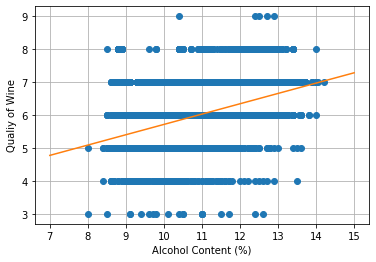

In [8]:
# TODO
x = np.array(df['alcohol'])
xp = np.linspace(7,15,100)
yp = beta0 + beta1*xp
plt.plot(x,y,'o')
plt.plot(xp,yp,'-')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Qualiy of Wine')
plt.grid(True)
print('RSS for this data = 0.0789')

## Multiple Linear Regression using all 11 features
-linear regression model was created

-model was fit on the training data

-model was predicted on the testing data

-R^2 was determined

In [9]:
regr = linear_model.LinearRegression()
regr.fit(Xtr, Ytr)
Ytest_pred = regr.predict(Xts)
RSS_test = np.mean(np.square(Ytest_pred-Yts))
Rsq_test = np.square(1-RSS_test/(np.std(Yts)))
print("R^2 =            {0:f}".format(Rsq_test))

R^2 =            0.122990


Creating plot showing poor accuracy of the multiple linear regression model of the test data

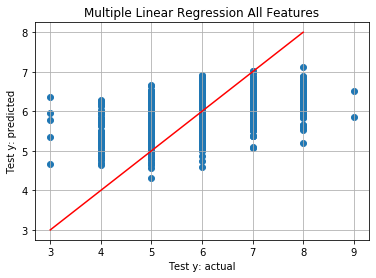

In [10]:
plt.scatter(Yts,Ytest_pred)
plt.plot([3,8],[3,8],'r')
plt.title('Multiple Linear Regression All Features')
plt.xlabel('Test y: actual')
plt.ylabel('Test y: predicted')
plt.grid()

## Multiple Linear Regression w/ Feature Selection
Feature selection is established
X = feature selected dataset

In [11]:
X = np.array(df[['residual sugar', 'volatile acidity', 'alcohol']])
X.shape
Xtr, Xts, Ytr, Yts = train_test_split(X, Y, test_size=0.3,shuffle=True)

-linear regression model was created

-model was fit on the training data

-model was predicted on the testing data

-R^2 was determined

In [12]:
regr = linear_model.LinearRegression()
regr.fit(Xtr, Ytr)
Ytest_pred = regr.predict(Xts)
RSS_test = np.mean(np.square(Ytest_pred-Yts))
Rsq_test = np.square(1-RSS_test/(np.std(Yts)))
print("R^2 =            {0:f}".format(Rsq_test))

R^2 =            0.112368


Creating plot showing poor accuracy of the multiple linear regression model of the test data

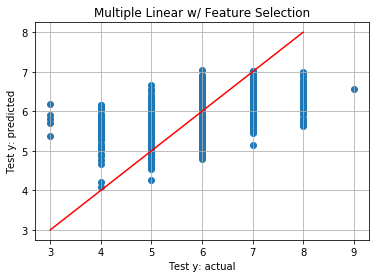

In [13]:
plt.scatter(Yts,Ytest_pred)
plt.plot([3,8],[3,8],'r')
plt.title('Multiple Linear w/ Feature Selection')
plt.xlabel('Test y: actual')
plt.ylabel('Test y: predicted')
plt.grid()

## LASSO

Lasso was used for feature selection to find what features were most contributing to wine quality.
Kfold was set up to determine the Mean squared error and Std of each fold and averaged over all folds. 

In [14]:
import sklearn.preprocessing
Xs = sklearn.preprocessing.scale(X0)
Ys = sklearn.preprocessing.scale(Y)

nfold = 10
kf = sklearn.model_selection.KFold(n_splits = nfold, shuffle = True)
lasso = linear_model.Lasso(warm_start = True)

nalpha = 100
alphas = np.logspace(-3,0, nalpha)

mse = np.zeros((nalpha,nfold))
for ifold, ind in enumerate(kf.split(Xs)):
    
    # Get the training data in the split
    Itr,Its = ind
    X_tr = Xs[Itr,:]
    y_tr = Ys[Itr]
    X_ts = Xs[Its,:]
    y_ts = Ys[Its]
    
    # Compute the lasso path for the split
    for ia, a in enumerate(alphas):
        
        # Fit the model on the training data
        lasso.alpha = a
        lasso.fit(X_tr,y_tr)
        
        # Compute the prediction error on the test data
        y_ts_pred = lasso.predict(X_ts)
        mse[ia,ifold] = np.mean((y_ts_pred-y_ts)**2)

Averaging means and std across folds

In [15]:
# Compute the mean and standard deviation over the different folds.
mse_mean = np.mean(mse,axis=1)
mse_std = np.std(mse,axis=1) / np.sqrt(nfold-1)

A one standard error rule plot was created to show the optimum alpha that should be used for the lowest MSE

Optimal alpha = 0.035112


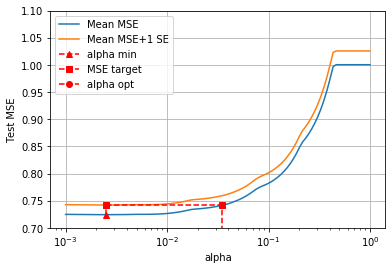

In [16]:
# Find the minimum MSE and MSE target
imin = np.argmin(mse_mean)
alpha_min = alphas[imin]
mse_min = mse_mean[imin]
mse_tgt = mse_min + mse_std[imin]

# Find the least complex model with mse_mean < mse_tgt
I = np.where(mse_mean < mse_tgt)[0]
iopt = I[-1]
alpha_opt = alphas[iopt]
print("Optimal alpha = %f" % alpha_opt)

# Plot the mean MSE and the mean MSE + 1 std dev
plt.semilogx(alphas, mse_mean)
plt.semilogx(alphas, mse_mean+mse_std)

# Plot the minimum MSE
plt.semilogx([alpha_min,alpha_min], [mse_min,mse_tgt], 'r^--')

# Plot the MSE
plt.semilogx([alpha_min,alpha_opt], [mse_tgt,mse_tgt], 'rs--')

# Plot the optimal alpha line
plt.semilogx([alpha_opt,alpha_opt], [0.35,mse_mean[iopt]], 'ro--')

plt.legend(['Mean MSE', 'Mean MSE+1 SE', 'alpha min','MSE target','alpha opt'],loc='upper left')
plt.xlabel('alpha')
plt.ylabel('Test MSE')
plt.ylim([0.7,1.1])
plt.grid()
plt.show()

Using the optimum alpha given above the model was refitted with the new parameter to find the coefficients of the regression to determine the features to be selected for this model

In [17]:
lasso.alpha = alpha_opt
lasso.fit(Xs,Ys)

# Print the coefficients
for i, c in enumerate(lasso.coef_):
    print("%8s %f" % (featurenames[i], c))

fixed acidity -0.032108
volatile acidity -0.190003
citric acid -0.000000
residual sugar 0.073764
chlorides -0.009687
free sulfur dioxide 0.043489
total sulfur dioxide -0.000000
 density -0.000000
      pH 0.000464
sulphates 0.018560
 alcohol 0.450343


A plot of the above coefficients was created to again show the feature selection process.

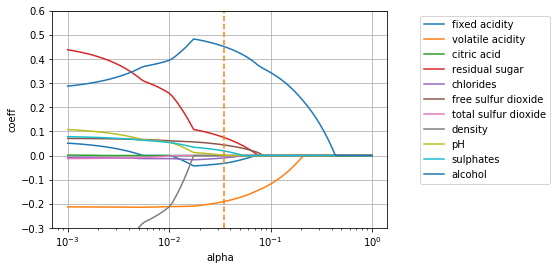

In [18]:
alphas1, coeffs, _ = sklearn.linear_model.lasso_path(Xs, Ys, alphas=alphas)

# Plot the paths of the coefficients
plt.semilogx(alphas1,coeffs.T)
plt.grid()
plt.legend(featurenames, loc='upper right', bbox_to_anchor=(1.5,1.0))


# Plot a line on the optimal alpha
plt.semilogx([alpha_opt,alpha_opt], [-0.3,0.8], '--')
plt.ylim([-0.3,0.6])
plt.xlabel('alpha')
plt.ylabel('coeff')
plt.show()

As seen above the features that are most dominant at the optimal alpha are

1. Alcohol
2. Volatile Acidity
3. Residual Sugar

These will be the features used for our feature selection processes

## Logistic Regression 11 Features
Logistic Regression using all given features in the data set. First trained with all the data and tested with all the data for all the solvers and iterated through C values in attempt to find the best Solver and C value.

In [19]:
nh = 20
C = np.logspace(-5,0,nh)
solver = ['lbfgs', 'newton-cg', 'sag', 'saga']
Xs = sklearn.preprocessing.scale(X0)
acc = np.zeros((nh, 4))
for n, Solver in enumerate(solver):
    for m, c in enumerate(C):
        logreg = linear_model.LogisticRegression(C=c, solver = Solver)
        logreg.fit(Xs, Y)
        yhat = logreg.predict(Xs)

        correct = 0
        for i in range(len(Y)):
            if (yhat[i] == Y[i]):
                correct = correct + 1;
        acc[m, n] = correct/len(Y)


The maximum accuracies were then obtained and printed for each of these solvers  

In [20]:
maxacc = [np.argmax(acc[:,0]), np.argmax(acc[:,1]), np.argmax(acc[:,2]), np.argmax(acc[:,3])]

for i in range(len(maxacc)):
    print(solver[i],'For max accuracy, C =', C[maxacc[i]])

lbfgs For max accuracy, C = 0.08858667904100823
newton-cg For max accuracy, C = 0.08858667904100823
sag For max accuracy, C = 0.08858667904100823
saga For max accuracy, C = 0.08858667904100823


-Kfold Cross Validation was used for all solvers and iterated through C values from 10^-5 - 1 logarithmically

-The results of the accuracy matrix were printed where rows are iterated C values and Columns are iterated Solvers

In [21]:
C = np.logspace(-5, 0,nh)
Kacc = np.zeros((nh, 4))
Kacc_se = np.zeros((nh, 4))
solver = ['lbfgs', 'newton-cg', 'sag', 'saga']
Xs = sklearn.preprocessing.scale(X0)
for n, Solver in enumerate(solver):
    for m, c in enumerate(C):
        nfold = 10
        kf = KFold(n_splits=nfold,shuffle=True)
        acc = []
        logreg = linear_model.LogisticRegression(C=c, solver = Solver)
        for train, test in kf.split(Xs):            
            correct = 0
            # Get training and test data
            Xtr = Xs[train,:]
            ytr = Y[train]
            Xts = Xs[test,:]
            yts = Y[test]

            # Fit a model
            logreg.fit(Xtr, ytr)
            yhat = logreg.predict(Xts)

            # Measure performance
            for i in range(len(yts)):
                if (yhat[i] == yts[i]):
                    correct = correct + 1;
            acci = correct/len(yts)
            acc.append(acci)
        # Take average values of the metric
        Kacc[m, n] = np.mean(acc)
        
        # Compute the standard errors
        Kacc_se[m,n] = np.std(acc)/np.sqrt(nfold-1)
print(Kacc)

[[0.44875256 0.44875631 0.44875089 0.4487609 ]
 [0.44875589 0.44876049 0.44876382 0.44875005]
 [0.4487488  0.44875214 0.44874588 0.44874129]
 [0.44853971 0.44854847 0.44855056 0.44855223]
 [0.44936605 0.4493527  0.44936772 0.4491507 ]
 [0.45344351 0.45345436 0.45304161 0.45344059]
 [0.46509328 0.46815283 0.46571136 0.46713117]
 [0.48468595 0.4838788  0.48365469 0.48427445]
 [0.49938609 0.49897959 0.50061558 0.50019782]
 [0.51061767 0.50979759 0.50958725 0.51020116]
 [0.5204282  0.51960394 0.51939777 0.52062685]
 [0.52389049 0.52614165 0.52306164 0.52510204]
 [0.52491257 0.52491215 0.52736071 0.52654355]
 [0.53247026 0.53267142 0.53328659 0.53062017]
 [0.53572722 0.53492091 0.53348107 0.53327866]
 [0.53552982 0.53449647 0.53347982 0.53285965]
 [0.53409666 0.53471725 0.53492091 0.53306707]
 [0.53695797 0.53633029 0.53470389 0.53675347]
 [0.53695923 0.53777138 0.5351179  0.53694671]
 [0.5353224  0.53369851 0.53327616 0.53572973]]


The maximum accuracies for each solver were determined from the matrix created above and printed

In [22]:
maxKacc = [np.argmax(Kacc[:,0]), np.argmax(Kacc[:,1]), np.argmax(Kacc[:,2]), np.argmax(Kacc[:,3])]
for i in range(len(solver)):
    print(solver[i],'Accuracy={0:.4f}, SE={1:.4f}'.format(Kacc[maxKacc[i],i], Kacc_se[maxKacc[i],i]))
    

lbfgs Accuracy=0.5370, SE=0.0079
newton-cg Accuracy=0.5378, SE=0.0041
sag Accuracy=0.5351, SE=0.0099
saga Accuracy=0.5369, SE=0.0063


One standard error rule was used to determine the C values that should be chosen

In [23]:
acc_tgt = np.zeros((4))   
iopt = np.zeros((4))  
for i in range(len(solver)):    
    acc_tgt[i] = Kacc[maxKacc[i], i] - Kacc_se[maxKacc[i], i]
    iopt[i] = np.where(Kacc[:,i] > acc_tgt[i])[0][0]

The resulting accuracies after one standard error rule were printed

In [24]:
iopt = np.array(iopt.astype(int))
for i in range(len(solver)):
    print(solver[i],'Accuracy={0:.4f}, SE={1:.4f}, C={2:.6f}'.format(Kacc[iopt[i],i], Kacc_se[iopt[i],i], C[iopt[i]]))

lbfgs Accuracy=0.5325, SE=0.0083, C=0.026367
newton-cg Accuracy=0.5349, SE=0.0079, C=0.048329
sag Accuracy=0.5274, SE=0.0052, C=0.014384
saga Accuracy=0.5333, SE=0.0086, C=0.048329


A plot was created to show the the accuracy of the lbfgs solver. This was the only plot made because they were all fairly identical. A superimposed line was also plotted to show the one standard error rule that was implemented

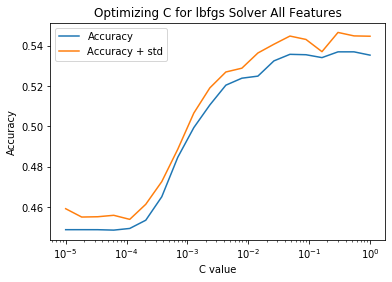

In [25]:
plt.semilogx(C, Kacc[:, 0])
plt.semilogx(C, Kacc[:, 0] + Kacc_se[:, 0])
plt.title('Optimizing C for lbfgs Solver All Features')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Accuracy' , 'Accuracy + std'])

## Logistic Regressions with Feature Selection
Feature selection was completed
X: Feature selected dataset

In [7]:
X = np.array(df[['residual sugar', 'volatile acidity', 'alcohol']])
X.shape

(4898, 3)

Logistic Regression using all given features in the data set. First trained with all the data and tested with all the data for all the solvers and iterated through C values in attempt to find the best Solver and C value.

In [8]:
nh = 20
C = np.logspace(-5,0,nh)
solver = ['lbfgs', 'newton-cg', 'sag', 'saga']
Xs = sklearn.preprocessing.scale(X)
acc = np.zeros((nh, 4))
for n, Solver in enumerate(solver):
    for m, c in enumerate(C):
        logreg = linear_model.LogisticRegression(C=c, solver = Solver)
        logreg.fit(Xs, Y)
        yhat = logreg.predict(Xs)

        correct = 0
        for i in range(len(Y)):
            if (yhat[i] == Y[i]):
                correct = correct + 1;
        acc[m, n] = correct/len(Y)
print(acc)


[[0.44875459 0.44875459 0.44875459 0.44875459]
 [0.44875459 0.44875459 0.44875459 0.44875459]
 [0.44875459 0.44875459 0.44875459 0.44875459]
 [0.44875459 0.44875459 0.44875459 0.44875459]
 [0.44875459 0.44875459 0.44875459 0.44875459]
 [0.44957125 0.44957125 0.44936709 0.44957125]
 [0.45835035 0.45835035 0.45835035 0.45835035]
 [0.47856268 0.47856268 0.47856268 0.47856268]
 [0.49857085 0.49857085 0.49795835 0.49857085]
 [0.51204573 0.51204573 0.51204573 0.51204573]
 [0.52531646 0.52531646 0.52531646 0.52531646]
 [0.5285831  0.5285831  0.5285831  0.5285831 ]
 [0.52878726 0.52878726 0.5285831  0.52878726]
 [0.53001225 0.53001225 0.53001225 0.53001225]
 [0.53021641 0.53021641 0.53021641 0.53021641]
 [0.53062474 0.53062474 0.53062474 0.53062474]
 [0.53164557 0.53164557 0.5314414  0.53164557]
 [0.53062474 0.53062474 0.53062474 0.53062474]
 [0.53001225 0.53001225 0.53001225 0.53001225]
 [0.53001225 0.53001225 0.53001225 0.53001225]]


The maximum accuracies were then obtained and printed for each of these solvers

In [9]:
maxacc = [np.argmax(acc[:,0]), np.argmax(acc[:,1]), np.argmax(acc[:,2]), np.argmax(acc[:,3])]
OptimalC = C[maxacc[0]]
print('For max accuracy, C =', OptimalC)

For max accuracy, C = 0.1623776739188721


-Kfold Cross Validation was used for all solvers and iterated through C values from 10^-5 - 1 logarithmically

-The results of the accuracy matrix were printed where rows are iterated C values and Columns are iterated Solvers

In [10]:
C = np.logspace(-5, 0,nh)
Kacc = np.zeros((nh, 4))
Kacc_se = np.zeros((nh, 4))
solver = ['lbfgs', 'newton-cg', 'sag', 'saga']
Xs = sklearn.preprocessing.scale(X)
for n, Solver in enumerate(solver):
    for m, c in enumerate(C):
        nfold = 10
        kf = KFold(n_splits=nfold,shuffle=True)
        acc = []
        logreg = linear_model.LogisticRegression(C=c, solver = Solver)
        for train, test in kf.split(Xs):            
            correct = 0
            # Get training and test data
            Xtr = Xs[train,:]
            ytr = Y[train]
            Xts = Xs[test,:]
            yts = Y[test]

            # Fit a model
            logreg.fit(Xtr, ytr)
            yhat = logreg.predict(Xts)

            # Measure performance
            for i in range(len(yts)):
                if (yhat[i] == yts[i]):
                    correct = correct + 1;
            acci = correct/len(yts)
            acc.append(acci)
        # Take average values of the metric
        Kacc[m, n] = np.mean(acc)
        
        # Compute the standard errors
        Kacc_se[m,n] = np.std(acc)/np.sqrt(nfold-1)
print(Kacc)

[[0.44875381 0.44874504 0.44875464 0.44876132]
 [0.44875297 0.44875548 0.44875798 0.44875715]
 [0.44875423 0.44875381 0.44875381 0.44876967]
 [0.44875089 0.44875172 0.44874838 0.44874922]
 [0.44874212 0.4487609  0.44875297 0.4487584 ]
 [0.44936564 0.44956554 0.4495718  0.44916907]
 [0.45548934 0.45569843 0.455895   0.45589124]
 [0.47284379 0.47408288 0.47489003 0.47550394]
 [0.49428404 0.4940904  0.49346688 0.49346855]
 [0.50735487 0.50837653 0.50879095 0.50815742]
 [0.52287008 0.52205542 0.52225617 0.52226117]
 [0.52715913 0.52817495 0.5275602  0.5281666 ]
 [0.52898543 0.52613163 0.52817954 0.52776178]
 [0.52715496 0.52756563 0.52980301 0.52634406]
 [0.52736697 0.53062059 0.52981094 0.52899378]
 [0.52899003 0.52858896 0.52961229 0.52755812]
 [0.52817912 0.52694337 0.53124077 0.52899336]
 [0.53062351 0.53083302 0.52817078 0.52981178]
 [0.53143608 0.52796711 0.53021368 0.52817036]
 [0.52858437 0.53082509 0.53021618 0.52961437]]


The maximum accuracies for each solver were determined from the matrix created above and printed

In [11]:
maxKacc = [np.argmax(Kacc[:,0]), np.argmax(Kacc[:,1]), np.argmax(Kacc[:,2]), np.argmax(Kacc[:,3])]
for i in range(len(solver)):
    print(solver[i],'Accuracy={0:.4f}, SE={1:.4f}'.format(Kacc[maxKacc[i],i], Kacc_se[maxKacc[i],i]))
    

lbfgs Accuracy=0.5314, SE=0.0084
newton-cg Accuracy=0.5308, SE=0.0051
sag Accuracy=0.5312, SE=0.0076
saga Accuracy=0.5298, SE=0.0070


One standard error rule was used to determine the C values that should be chosen

In [12]:
acc_tgt = np.zeros((4))   
iopt = np.zeros((4))  
for i in range(len(solver)):    
    acc_tgt[i] = Kacc[maxKacc[i], i] - Kacc_se[maxKacc[i], i]
    iopt[i] = np.where(Kacc[:,i] > acc_tgt[i])[0][0]

The resulting accuracies after one standard error rule were printed

In [13]:
iopt = np.array(iopt.astype(int))
for i in range(len(solver)):
    print(solver[i],'Accuracy={0:.4f}, SE={1:.4f}, C={2:.6f}'.format(Kacc[iopt[i],i], Kacc_se[iopt[i],i], C[iopt[i]]))

lbfgs Accuracy=0.5272, SE=0.0085, C=0.007848
newton-cg Accuracy=0.5282, SE=0.0060, C=0.007848
sag Accuracy=0.5276, SE=0.0046, C=0.007848
saga Accuracy=0.5282, SE=0.0097, C=0.007848


A plot was created to show the the accuracy of the lbfgs solver. This was the only plot made because they were all fairly identical. A superimposed line was also plotted to show the one standard error rule that was implemented

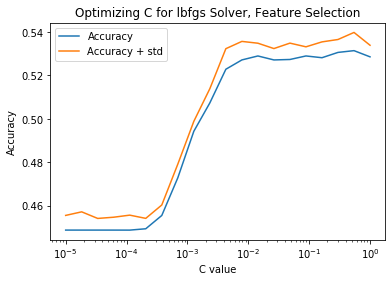

In [14]:
plt.semilogx(C, Kacc[:, 0])
plt.semilogx(C, Kacc[:, 0] + Kacc_se[:, 0])
plt.title('Optimizing C for lbfgs Solver, Feature Selection')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Accuracy' , 'Accuracy + std'])

## Support Vector Machine

The following code shows the support vector machine (SVM) classification method that was followed to classify the data into training/test and see if the features are a good predictor of wine quality. 

This classification method was followed in conjunction with Logistical Regression as well as a 2-Layer Neural Network in order to compare accuracies and observe which one would give us the best results.

In [26]:
#print(dataset)
# get training/test data (all features)
X0 = dataset[:,:-1]
# only choose the 3 best features (according to feature selection 
# performed prior) and observe if there is any difference
X_features = np.array(df[['volatile acidity', 'residual sugar', 'alcohol']])
#y = dataset[:,-1]
#y = np.ravel(y) # need to ravel output data to make sure it runs correctly
y = np.array(df['quality'])
print(y.shape) # print values to make sure they are correct before proceeding
print(X_features.shape)
print(X_features)

(4898,)
(4898, 3)
[[ 0.27 20.7   8.8 ]
 [ 0.3   1.6   9.5 ]
 [ 0.28  6.9  10.1 ]
 ...
 [ 0.24  1.2   9.4 ]
 [ 0.29  1.1  12.8 ]
 [ 0.21  0.8  11.8 ]]


Before we proceed, we first split the data into training and test data (in a 70/30 format), and then make sure to shuffle the data for consistent test accuracies.

In [27]:
Xtr, Xts, Ytr, Yts = train_test_split(X0, y, test_size=0.3,shuffle=True)

Now, we need to find optimal values for C and gamma. We need to do this in order to ensure peak functionality/performance of our dataset and so that we are able to maximize accuracy. 

We do this by performing the following code (a for loop) which loops through multiple possibilities for C and gamma, and chooses the ones that result in the highest accuracy. After finding the C and gamma that give us the best result, we perform SVC on this data.

This procedure was used for both the **all features** data set and the **feature selection** data set, which included the 3 best parameters that best predicted the quality of wine. These were volatile acidity, residual sugar and alcohol content.

Finding C and gamma for **all features**:

In [28]:
# predicting the C and gamma using a range of values
from sklearn import svm
C_test = [1,10, 100, 1000]
gam_test = [0.01,0.1, 1, 10]

nC = len(C_test)
ngam = len(gam_test)
acc = np.zeros((nC,ngam))

# Measure and print the accuracy for each C and gamma value.  
# Store the results in variable called 'acc'
for i, C in enumerate(C_test):
    for j, gam in enumerate(gam_test):
        
        # Create the SVC
        svc = svm.SVC(probability=False,  kernel="rbf", C=C, gamma=gam,verbose=1)
        
        # Fit the data        
        svc.fit(Xtr,Ytr)
        
        # Predict 
        yhat = svc.predict(Xts)
        acc[i,j] = np.mean(yhat == Yts)
        print('C=%12.4e gam=%12.4e acc=%f' % (C,gam,acc[i,j]))   

[LibSVM]C=  1.0000e+00 gam=  1.0000e-02 acc=0.487075
[LibSVM]C=  1.0000e+00 gam=  1.0000e-01 acc=0.558503
[LibSVM]C=  1.0000e+00 gam=  1.0000e+00 acc=0.589116
[LibSVM]C=  1.0000e+00 gam=  1.0000e+01 acc=0.590476
[LibSVM]C=  1.0000e+01 gam=  1.0000e-02 acc=0.527211
[LibSVM]C=  1.0000e+01 gam=  1.0000e-01 acc=0.554422
[LibSVM]C=  1.0000e+01 gam=  1.0000e+00 acc=0.587075
[LibSVM]C=  1.0000e+01 gam=  1.0000e+01 acc=0.591156
[LibSVM]C=  1.0000e+02 gam=  1.0000e-02 acc=0.557143
[LibSVM]C=  1.0000e+02 gam=  1.0000e-01 acc=0.554422
[LibSVM]C=  1.0000e+02 gam=  1.0000e+00 acc=0.587075
[LibSVM]C=  1.0000e+02 gam=  1.0000e+01 acc=0.591156
[LibSVM]C=  1.0000e+03 gam=  1.0000e-02 acc=0.557143
[LibSVM]C=  1.0000e+03 gam=  1.0000e-01 acc=0.554422
[LibSVM]C=  1.0000e+03 gam=  1.0000e+00 acc=0.587075
[LibSVM]C=  1.0000e+03 gam=  1.0000e+01 acc=0.591156


In [29]:
# Print the maximum accuracy and the corresponding best C and gamma
acc_max = np.max(acc)
ind = np.argmax(acc)
i, j = np.unravel_index(ind, (nC,ngam))

print('Max accuracy = %12.4e' % acc_max)
print('Optimal C=%12.4e gam = %12.4e' % (C_test[i], gam_test[j]))

Max accuracy =   5.9116e-01
Optimal C=  1.0000e+01 gam =   1.0000e+01


Use optimal C and gamma values to find the highest accuracy run for SVC (redundant step, but gives you an overview of how to perform SVC)

The 'sigmoid' kernel is also used for comparison (the kernels 'linear' and 'poly' do not work). The purpose of displaying the sigmoid kernel is to display the inaccuracies associated with this process compared to rbf.

In [30]:
svcrbf = svm.SVC(probability=False, kernel='rbf', C = C_test[i], gamma = gam_test[j], verbose=1)
svcrbf.fit(Xtr,Ytr)
yhat_ts = svcrbf.predict(Xts)
acc = np.mean(yhat_ts == Yts)
print("Max accuracy (RBF) = {0:f}".format(acc))

svcsig = svm.SVC(probability=False, kernel='sigmoid', C = C_test[i], gamma = gam_test[j], verbose=1)
svcsig.fit(Xtr,Ytr)
yhat_ts = svcsig.predict(Xts)
acc = np.mean(yhat_ts == Yts)
print("Max accuracy (sigmoid) = {0:f}".format(acc)) 

[LibSVM]Max accuracy (RBF) = 0.591156
[LibSVM]Max accuracy (sigmoid) = 0.438776


We now will find the number of support vectors that were used for the RBF kernel. This is determined based on the values we chose for C (and gamma).

In [31]:
S = svcrbf.support_vectors_
#print(S.shape)
print('Number of support vectors = {0:.0f}'.format(S.shape[0]))

Number of support vectors = 2934


Perform the operation after performing feature selection (with the 3 best features - volatile acidity, residual sugar and alcohol content).

In [32]:
Xtr_features, Xts_features, Ytr_features, Yts_features = train_test_split(X_features, y, test_size=0.3, shuffle=True)

In [33]:
C_test = [1,10, 100, 1000]
gam_test = [0.01,0.1, 1, 10]

nC = len(C_test)
ngam = len(gam_test)
acc = np.zeros((nC,ngam))

# Measure and print the accuracy for each C and gamma value.  
# Store the results in a variable called 'acc'
for i, C in enumerate(C_test):
    for j, gam in enumerate(gam_test):
        
        # Create the SVC
        svc = svm.SVC(probability=False,  kernel="rbf", C=C, gamma=gam,verbose=1)
        
        # Fit the data        
        svc.fit(Xtr_features,Ytr_features)
        
        # Predict 
        yhat = svc.predict(Xts_features)
        acc[i,j] = np.mean(yhat == Yts_features)
        print('C=%12.4e gam=%12.4e acc=%f' % (C,gam,acc[i,j]))

[LibSVM]C=  1.0000e+00 gam=  1.0000e-02 acc=0.494558
[LibSVM]C=  1.0000e+00 gam=  1.0000e-01 acc=0.493197
[LibSVM]C=  1.0000e+00 gam=  1.0000e+00 acc=0.518367
[LibSVM]C=  1.0000e+00 gam=  1.0000e+01 acc=0.549660
[LibSVM]C=  1.0000e+01 gam=  1.0000e-02 acc=0.501361
[LibSVM]C=  1.0000e+01 gam=  1.0000e-01 acc=0.523129
[LibSVM]C=  1.0000e+01 gam=  1.0000e+00 acc=0.531973
[LibSVM]C=  1.0000e+01 gam=  1.0000e+01 acc=0.562585
[LibSVM]C=  1.0000e+02 gam=  1.0000e-02 acc=0.525170
[LibSVM]C=  1.0000e+02 gam=  1.0000e-01 acc=0.536054
[LibSVM]C=  1.0000e+02 gam=  1.0000e+00 acc=0.555102
[LibSVM]C=  1.0000e+02 gam=  1.0000e+01 acc=0.565986
[LibSVM]C=  1.0000e+03 gam=  1.0000e-02 acc=0.517007
[LibSVM]C=  1.0000e+03 gam=  1.0000e-01 acc=0.531973
[LibSVM]C=  1.0000e+03 gam=  1.0000e+00 acc=0.544898
[LibSVM]C=  1.0000e+03 gam=  1.0000e+01 acc=0.567347


In [34]:
# Print the maximum accuracy and the corresponding best C and gamma
acc_max = np.max(acc)
ind = np.argmax(acc)
i, j = np.unravel_index(ind, (nC,ngam))

print('Max accuracy = %12.4e' % acc_max)
print('Optimal C=%12.4e gam = %12.4e' % (C_test[i], gam_test[j]))

Max accuracy =   5.6735e-01
Optimal C=  1.0000e+03 gam =   1.0000e+01


Start SVC prediction (for best features only)

In [35]:
svcrbf = svm.SVC(probability=False, kernel='rbf', C= C_test[i], gamma = gam_test[j], verbose=1)
svcrbf.fit(Xtr_features,Ytr_features)
yhat_ts = svcrbf.predict(Xts_features)
acc = np.mean(yhat_ts == Yts_features)
print("Max Accuracy (RBF) = {0:f}".format(acc))

svcsig = svm.SVC(probability=False, kernel='sigmoid', C= C_test[i], gamma = gam_test[j], verbose=1)
svcsig.fit(Xtr_features,Ytr_features)
yhat_ts = svcsig.predict(Xts_features)
acc = np.mean(yhat_ts == Yts_features)
print("Max Accuracy (sigmoid) = {0:f}".format(acc))

[LibSVM]Max Accuracy (RBF) = 0.567347
[LibSVM]Max Accuracy (sigmoid) = 0.457143


As we can observe from the above data, we find that using all the features results in a better accuracy (approx. 59-61%) when compared to using the 3 best features (approx. 55-57%) to predict the wine quality. 

This is very interesting, and points towards the fact that the features are probably not the best attributes to predict wine quality, or that the wine quality was chosen somewhat arbitrarily with no observable relationship to these features.

The number of support vectors used for the 3 best features SVM classification was the following:

In [36]:
S = svcrbf.support_vectors_
#print(S.shape)
print('Number of support vectors = {0:.0f}'.format(S.shape[0]))

Number of support vectors = 2717


# Neural Network

In [37]:
# Import data
df = pd.read_csv('winequality-white.csv')

# Seperate input and output
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

# Split training and testing data
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize input and output data
Xtr_mean = np.mean(Xtr, axis=0)
Xtr_std = np.std(Xtr, axis=0)
Xtr_scale = (Xtr - Xtr_mean[None,:])/Xtr_std[None,:]
Xts_mean = np.mean(Xts, axis=0)
Xts_std = np.std(Xts, axis=0)
Xts_scale = (Xts - Xts_mean[None,:])/Xts_std[None,:]
ytr = ytr.reshape(-1)
yts = yts.reshape(-1)

# Transform arrays into tensors
Xtr_torch = torch.Tensor(Xtr_scale)
Xts_torch = torch.Tensor(Xts_scale)
ytr_torch = torch.Tensor(ytr)
yts_torch = torch.Tensor(yts)

# Create training dataset and data loader from tensors
train_ds = torch.utils.data.TensorDataset(Xtr_torch, ytr_torch)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=100, shuffle=True) 

# Create testing dataset and data loader from tensors
test_ds = torch.utils.data.TensorDataset(Xts_torch, yts_torch)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=100, shuffle=True) 

Construct Neural Network Model

In [38]:
# Set layer dimension
nin = X.shape[1] # Dimension of input data
nh = 30 # Number of Hidden Units
nh2 = 20 # Number of Hidden Units
nout = np.max(y) + 1 # Number of outputs

class Net(nn.Module):
    def __init__(self,nin,nh,nh2, nout):
        super(Net,self).__init__()
        self.sigmoid = nn.Sigmoid()
        self.Dense1 = nn.Linear(nin,nh)
        self.Dense2 = nn.Linear(nh,nh2)
        self.Dense3 = nn.Linear(nh2,nout)
        
    def forward(self,x):
        x = self.sigmoid(self.Dense1(x))
        x2 = self.sigmoid(self.Dense2(x))
        out = self.Dense3(x2)
        return out

model = Net(nin=nin, nh=nh, nh2=nh2, nout=nout)
print(model)

Net(
  (sigmoid): Sigmoid()
  (Dense1): Linear(in_features=11, out_features=30, bias=True)
  (Dense2): Linear(in_features=30, out_features=20, bias=True)
  (Dense3): Linear(in_features=20, out_features=10, bias=True)
)


In [39]:
opt = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Set learning rates
rates = [0.1, 0.01, 0.001, 0.0001]

# Set epoch iterations
num_epoch = 500

a_tr_loss = np.zeros([len(rates), num_epoch])
a_tr_accuracy = np.zeros([len(rates), num_epoch])
a_ts_loss = np.zeros([len(rates), num_epoch])
a_ts_accuracy = np.zeros([len(rates), num_epoch])
index = 1

for i,j in enumerate(rates):
    index = 0
    
    model = Net(nin=nin, nh=nh, nh2=nh2, nout=nout)
    opt = optim.Adam(model.parameters(), lr = j)
    
    for epoch in range(num_epoch):
        index = index + 1
        model.train() # put model in training mode
        correct = 0 # initialize error counter
        total = 0 # initialize total counter
        batch_loss_tr = []
        
        # iterate over training set
        for train_iter, data in enumerate(train_loader):
            x_batch,y_batch = data
            y_batch = y_batch.type(torch.long)
            out = model(x_batch)
            
            # Compute Loss
            loss = criterion(out,y_batch)
            batch_loss_tr.append(loss.item())
            
            # Compute gradients using back propagation
            opt.zero_grad()
            loss.backward()
            
            # Take an optimization step
            opt.step()
            
            # Do hard classification: index of largest score
            _, predicted = torch.max(out.data, 1)
            
            # Compute number of decision errors
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
        
        a_tr_loss[i, epoch] = np.mean(batch_loss_tr) # Compute average loss over epoch
        a_tr_accuracy[i, epoch] = 100*correct/total
        
        
        model.eval() # put model in evaluation mode
        correct = 0 # initialize error counter
        total = 0 # initialize total counter
        batch_loss_ts = []
        
        with torch.no_grad():
            for data in test_loader:
                num, labels = data
                labels = labels.type(torch.long)
                outputs = model(num)
                batch_loss_ts.append(criterion(outputs,labels).item())
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
            
        a_ts_loss[i, epoch] = np.mean(batch_loss_ts)
        a_ts_accuracy[i, epoch] = 100*correct/total
        # Print details every print_mod epoch
        if index%50 == 0:
            print('Learning Rate: {0}  Epoch: {1:2d}   Train Loss: {2:.3f}   '.format(j, epoch+1, a_tr_loss[i, epoch])
                  +'Train Accuracy: {0:.2f}    Test Loss: {1:.3f}   '.format(a_tr_accuracy[i, epoch], a_ts_loss[i, epoch])
                  +'Test Accuracy: {0:.2f}'.format(a_ts_accuracy[i, epoch]))

Learning Rate: 0.1  Epoch: 50   Train Loss: 0.758   Train Accuracy: 68.67    Test Loss: 1.334   Test Accuracy: 52.18
Learning Rate: 0.1  Epoch: 100   Train Loss: 0.725   Train Accuracy: 70.19    Test Loss: 1.392   Test Accuracy: 55.03
Learning Rate: 0.1  Epoch: 150   Train Loss: 0.657   Train Accuracy: 72.84    Test Loss: 1.617   Test Accuracy: 55.65
Learning Rate: 0.1  Epoch: 200   Train Loss: 0.659   Train Accuracy: 73.54    Test Loss: 1.639   Test Accuracy: 56.60
Learning Rate: 0.1  Epoch: 250   Train Loss: 0.616   Train Accuracy: 75.44    Test Loss: 1.729   Test Accuracy: 55.17
Learning Rate: 0.1  Epoch: 300   Train Loss: 0.577   Train Accuracy: 77.22    Test Loss: 1.806   Test Accuracy: 55.37
Learning Rate: 0.1  Epoch: 350   Train Loss: 0.588   Train Accuracy: 76.81    Test Loss: 1.852   Test Accuracy: 55.31
Learning Rate: 0.1  Epoch: 400   Train Loss: 0.621   Train Accuracy: 75.82    Test Loss: 1.739   Test Accuracy: 55.51
Learning Rate: 0.1  Epoch: 450   Train Loss: 0.638   Trai

Plot Graphs

Text(0, 0.5, 'Testing Accuracy')

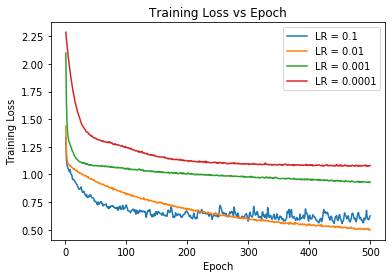

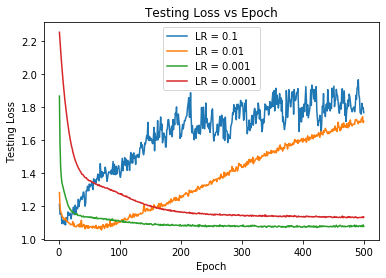

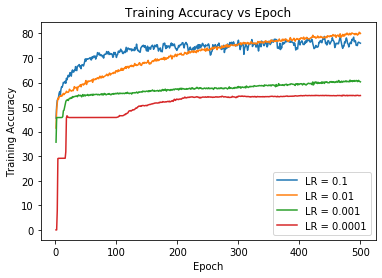

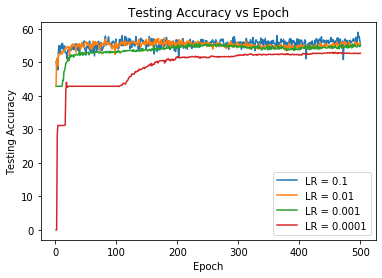

In [40]:
# Training Loss
plt.figure()
for i in range(len(rates)):
    plt.plot(range(1, num_epoch+1), a_tr_loss[i, :])
plt.legend(['LR = 0.1', 'LR = 0.01', 'LR = 0.001', 'LR = 0.0001'])
plt.title('Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

# Testing Loss
plt.figure()
for i in range(len(rates)):
    plt.plot(range(1, num_epoch+1), a_ts_loss[i, :])
plt.legend(['LR = 0.1', 'LR = 0.01', 'LR = 0.001', 'LR = 0.0001'])
plt.title('Testing Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')

# Training Accuracy
plt.figure()
for i in range(len(rates)):
    plt.plot(range(1, num_epoch+1), a_tr_accuracy[i, :])
plt.legend(['LR = 0.1', 'LR = 0.01', 'LR = 0.001', 'LR = 0.0001'])
plt.title('Training Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')

# Testing Accuracy
plt.figure()
for i in range(len(rates)):
    plt.plot(range(1, num_epoch+1), a_ts_accuracy[i, :])
plt.legend(['LR = 0.1', 'LR = 0.01', 'LR = 0.001', 'LR = 0.0001'])
plt.title('Testing Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')

# Neural Network with Feature Selection

In [41]:
X = np.array(df[['residual sugar', 'volatile acidity', 'alcohol']])

# Split training and testing data
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize input and output data
Xtr_mean = np.mean(Xtr, axis=0)
Xtr_std = np.std(Xtr, axis=0)
Xtr_scale = (Xtr - Xtr_mean[None,:])/Xtr_std[None,:]
Xts_mean = np.mean(Xts, axis=0)
Xts_std = np.std(Xts, axis=0)
Xts_scale = (Xts - Xts_mean[None,:])/Xts_std[None,:]
ytr = ytr.reshape(-1)
yts = yts.reshape(-1)

# Transform arrays into tensors
Xtr_torch = torch.Tensor(Xtr_scale)
Xts_torch = torch.Tensor(Xts_scale)
ytr_torch = torch.Tensor(ytr)
yts_torch = torch.Tensor(yts)

# Create training dataset and data loader from tensors
train_ds = torch.utils.data.TensorDataset(Xtr_torch, ytr_torch)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=100, shuffle=True) 

# Create testing dataset and data loader from tensors
test_ds = torch.utils.data.TensorDataset(Xts_torch, yts_torch)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=100, shuffle=True) 

In [42]:
# Set layer dimension
nin = X.shape[1] # Dimension of input data
nh = 30 # Number of Hidden Units
nh2 = 20 # Number of Hidden Units
nout = np.max(y) + 1 # Number of outputs

class Net(nn.Module):
    def __init__(self,nin,nh,nh2, nout):
        super(Net,self).__init__()
        self.sigmoid = nn.Sigmoid()
        self.Dense1 = nn.Linear(nin,nh)
        self.Dense2 = nn.Linear(nh,nh2)
        self.Dense3 = nn.Linear(nh2,nout)
        
    def forward(self,x):
        x = self.sigmoid(self.Dense1(x))
        x2 = self.sigmoid(self.Dense2(x))
        out = self.Dense3(x2)
        return out

model = Net(nin=nin, nh=nh, nh2=nh2, nout=nout)
print(model)

Net(
  (sigmoid): Sigmoid()
  (Dense1): Linear(in_features=3, out_features=30, bias=True)
  (Dense2): Linear(in_features=30, out_features=20, bias=True)
  (Dense3): Linear(in_features=20, out_features=10, bias=True)
)


In [43]:
# Optimizer
opt = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Set learning rates
rates = [0.1, 0.01, 0.001, 0.0001]

# Set epoch iterations
num_epoch = 500

a_tr_loss = np.zeros([len(rates), num_epoch])
a_tr_accuracy = np.zeros([len(rates), num_epoch])
a_ts_loss = np.zeros([len(rates), num_epoch])
a_ts_accuracy = np.zeros([len(rates), num_epoch])
index = 1

for i,j in enumerate(rates):
    index = 0
    
    model = Net(nin=nin, nh=nh, nh2=nh2, nout=nout)
    opt = optim.Adam(model.parameters(), lr = j)
    
    for epoch in range(num_epoch):
        index = index + 1
        model.train() # put model in training mode
        correct = 0 # initialize error counter
        total = 0 # initialize total counter
        batch_loss_tr = []
        
        # iterate over training set
        for train_iter, data in enumerate(train_loader):
            x_batch,y_batch = data
            y_batch = y_batch.type(torch.long)
            out = model(x_batch)
            
            # Compute Loss
            loss = criterion(out,y_batch)
            batch_loss_tr.append(loss.item())
            
            # Compute gradients using back propagation
            opt.zero_grad()
            loss.backward()
            
            # Take an optimization step
            opt.step()
            
            # Do hard classification: index of largest score
            _, predicted = torch.max(out.data, 1)
            
            # Compute number of decision errors
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
        
        a_tr_loss[i, epoch] = np.mean(batch_loss_tr) # Compute average loss over epoch
        a_tr_accuracy[i, epoch] = 100*correct/total
        
        
        model.eval() # put model in evaluation mode
        correct = 0 # initialize error counter
        total = 0 # initialize total counter
        batch_loss_ts = []
        
        with torch.no_grad():
            for data in test_loader:
                num, labels = data
                labels = labels.type(torch.long)
                outputs = model(num)
                batch_loss_ts.append(criterion(outputs,labels).item())
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
            
        a_ts_loss[i, epoch] = np.mean(batch_loss_ts)
        a_ts_accuracy[i, epoch] = 100*correct/total
        # Print details every print_mod epoch
        if index%50 == 0:
            print('Learning Rate: {0}  Epoch: {1:2d}   Train Loss: {2:.3f}   '.format(j, epoch+1, a_tr_loss[i, epoch])
                  +'Train Accuracy: {0:.2f}    Test Loss: {1:.3f}   '.format(a_tr_accuracy[i, epoch], a_ts_loss[i, epoch])
                  +'Test Accuracy: {0:.2f}'.format(a_ts_accuracy[i, epoch]))

Learning Rate: 0.1  Epoch: 50   Train Loss: 1.054   Train Accuracy: 54.87    Test Loss: 1.130   Test Accuracy: 52.93
Learning Rate: 0.1  Epoch: 100   Train Loss: 1.033   Train Accuracy: 55.16    Test Loss: 1.159   Test Accuracy: 51.90
Learning Rate: 0.1  Epoch: 150   Train Loss: 1.009   Train Accuracy: 57.82    Test Loss: 1.188   Test Accuracy: 52.52
Learning Rate: 0.1  Epoch: 200   Train Loss: 0.996   Train Accuracy: 57.53    Test Loss: 1.199   Test Accuracy: 53.13
Learning Rate: 0.1  Epoch: 250   Train Loss: 1.004   Train Accuracy: 57.38    Test Loss: 1.241   Test Accuracy: 50.75
Learning Rate: 0.1  Epoch: 300   Train Loss: 0.984   Train Accuracy: 57.38    Test Loss: 1.293   Test Accuracy: 50.54
Learning Rate: 0.1  Epoch: 350   Train Loss: 1.005   Train Accuracy: 57.29    Test Loss: 1.335   Test Accuracy: 52.59
Learning Rate: 0.1  Epoch: 400   Train Loss: 1.004   Train Accuracy: 57.56    Test Loss: 1.391   Test Accuracy: 50.88
Learning Rate: 0.1  Epoch: 450   Train Loss: 0.989   Trai

Plots

Text(0, 0.5, 'Testing Accuracy')

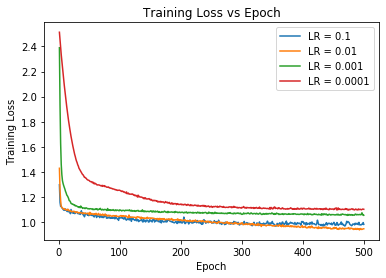

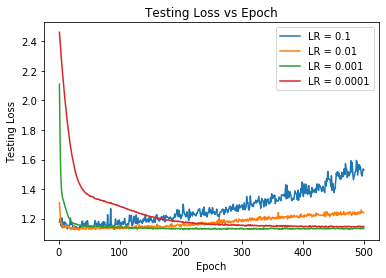

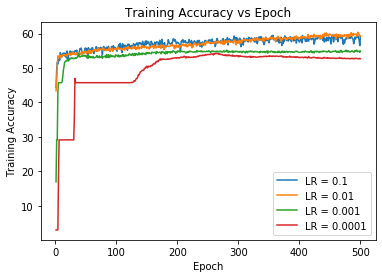

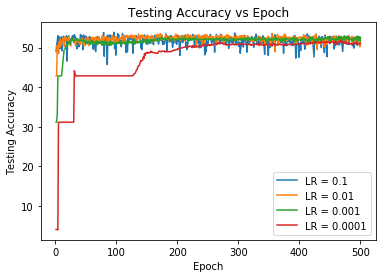

In [44]:
# Training Loss
plt.figure()
for i in range(len(rates)):
    plt.plot(range(1, num_epoch+1), a_tr_loss[i, :])
plt.legend(['LR = 0.1', 'LR = 0.01', 'LR = 0.001', 'LR = 0.0001'])
plt.title('Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

# Testing Loss
plt.figure()
for i in range(len(rates)):
    plt.plot(range(1, num_epoch+1), a_ts_loss[i, :])
plt.legend(['LR = 0.1', 'LR = 0.01', 'LR = 0.001', 'LR = 0.0001'])
plt.title('Testing Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')

# Training Accuracy
plt.figure()
for i in range(len(rates)):
    plt.plot(range(1, num_epoch+1), a_tr_accuracy[i, :])
plt.legend(['LR = 0.1', 'LR = 0.01', 'LR = 0.001', 'LR = 0.0001'])
plt.title('Training Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')

# Testing Accuracy
plt.figure()
for i in range(len(rates)):
    plt.plot(range(1, num_epoch+1), a_ts_accuracy[i, :])
plt.legend(['LR = 0.1', 'LR = 0.01', 'LR = 0.001', 'LR = 0.0001'])
plt.title('Testing Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')

# XGBoost

In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Seperate input and output
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

# Split training and testing data
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize input and output data
Xtr_mean = np.mean(Xtr, axis=0)
Xtr_std = np.std(Xtr, axis=0)
Xtr_scale = (Xtr - Xtr_mean[None,:])/Xtr_std[None,:]
Xts_mean = np.mean(Xts, axis=0)
Xts_std = np.std(Xts, axis=0)
Xts_scale = (Xts - Xts_mean[None,:])/Xts_std[None,:]
ytr = ytr.reshape(-1)
yts = yts.reshape(-1)

# Fit model on training data
clf = XGBClassifier()
clf.fit(Xtr_scale, ytr)

# Predict on test data and calculate accuracy
y_pred = clf.predict(Xts_scale)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(yts, predictions)
print('Accuracy: %.2f%%' % (accuracy*100))

Accuracy: 63.67%
